# Тематическое моделирование

*Тематическое моделирование* (topic modeling) -- приложение машиннного обучения к анализу текстов.

*Тематическая модель* (topic model) коллекции текстовых документов определяет, к каким темам относится каждый документ и какие слова (термины) образуют каждую тему.

*Вероятностная тематическая модель* (ВТМ) описывает каждую тему дискретным распределением на множестве терминов, каждый документ дискретным распределением на множестве тем. 
Предполагается, что коллекция документов -- это последовательность терминов, выбранных случайно и независимо из смеси таких рпспределений, и ставится задача восстановления компонент смеси по выборке.

ВТМ осуществляет мягкую классификацию (документ может относится к нескольким выборкам, при этом решается проблема синонимов и омонимов).

Применяется для:
* выявления трендов в научных публикациях/новостных потоках,
* классификации и категоризациии документов, изображений и видео,
* информационного поиска, в том числе многоязычного,
* тегирования веб-страниц,
* обнаружения спама,
* рекомендательных систем,
* и др.

## Вероятностная модель колллекции документов

Пусть $D$ -- множество (коллекция) текстовых документов, $W$ -- множество (словарь) всех употребляемых в них терминов (слов или словосочетаний). Каждый документ $d\in D$ представляет собой последовательность $n_d$ терминов $(w_1,\dots,w_{n_d})$ из словаря $W$. Термин может повторяться в документе несколько раз.

### Вероятностное пространство и гипотеза независимости 

Предпологается, что существует конечное множество тем $T$, и каждое употребление термина $w$ в каждом документе $d$ связано с некоторой темой $t\in T$, которая неизвестна. Коллекция документов рассматривается как множество троек $(d,w,t)$, заданного на конечном множестве $D\times W \times T$. Документы $d\in D$ и термины $w\in W$ являются наблюдаемыми переменными, тема $t \in T$ является латентной (скрытой) переменной.

Гипотеза о независимости элементов выборки эквивалентна предположению "Мешок слов" (bag-of-words), -- что порядок терминов в документах не важен для выявления тематики, то есть тематику документа можно узнать даже после произвольной перестановки терминов, хотя для человека такой текст теряет смысл. Порядок документов в колллекции также не имеет значения -- предположение называют гипотезой "мешка документов".

Приняв гипотезу "мешка слов", можно перейти к более компактному представлению документа как подмножества $d \subset W$, в ккотором каждому жлементу $w\in d$ поставлено в соответствие число $n_{dw}$ вхождений термина $w$ в документ $d$.

### Постановка задачи тематического моделирования

Построить тематическую модель коллекции документов $D$ -- значит найти множество тем $T$, распределения $p(w|t)$ для всех тем $t\in T$ и распредления $p(t|d)$ для всех $d \in D$. Можно также говорить о задаче совместной "мягкой" класстеризации множества документов и множества слов по множесту кластер-тем. Мягкая кластеризация означает, что каждый документ или термин не жёстко приписывается какой-то одной теме, а распределяется по нескольким темам.

Найденные распределения используются затем для решения прикладных задач. Распределение $p(t|d)$ является удобным признаковым описанием документа в задачах информационного поиска, классификации и категоризации документов.

### Гипотеза условной независимости

Будем полагать, что появление слов в документе $d$, относящихся к теме $t$, описывается общим для всей коллекции распредлением $p(w|t)$ и не зависит от документа d. Следующие представления этой гипотезы эквивалентны:

\begin{equation}
  \begin{gathered}
    p(w|d,t)=p(w|t); \\
    p(d|w,t)=p(d|t); \\
    p(d,w|t)=p(d|t)p(w|t).
  \end{gathered}
\end{equation}

### Вероятностная модель порождения данных

Согласно определению условной вероятности, формуле полной вероятности и гипотезе условной независимости

\begin{equation} \tag{2}
  p(w|d) = \sum_{t\in T}p(t|d)p(w|t).
\end{equation}

Если формула кажется не очевидной, приведём вывод:

Согласно опредлению условной вероятности:
$$p(w|d) = \frac{p(w, d)}{p(d)}$$

По формуле полной вероятности:
$$p(w,d) = \sum_{t\in T} p(w,d|t)p(t)$$

По гипотезе условной независимости (1. 3 пункт):
$$p(w,d) = \sum_{t\in T} p(w|t)p(d|t)p(t)$$

Расписав 
$$p(d|t) = \frac{p(d,t)}{p(t)},$$
получим:
$$p(w,d) = \sum_{t\in T} p(w|t)p(d,t)$$

$$\scriptsize\textit{посмотри налево}$$

Поскольку $p(d,t)=p(t,d)$,
$$p(t,d)=p(t|d)p(d),$$
и тогда:
$$p(w,d) = \sum_{t\in T} p(w|t)p(t|d)p(d).$$

Подставив в самое начало, получим: 
$$p(w|d) = \frac{\sum\limits_{t\in T} p(w|t)p(t|d)p(d)}{p(d)},$$
откуда:
$$p(w|d) = \sum_{t\in T} p(t|d)p(w|t)p(d).$$

Если распределения $p(t|d)$ и $p(w|t)$ известны, то вероятностная модель $(2)$ описывает процесс порождения коллекции $D$. 

Построение тематической модели -- обратная задача: по известной коллекции $D$ требуется восстановить породившие её распределения $p(t|d)$ и $p(w|t)$.

![ALGORITHM](Алгоритм.bmp)

### Гипотеза разреженности

Естественно предполагать, что каждый документ $d$ и каждый термин $w$ связан с небольшим числом тем $t$. В таком случае значительная часть вероятностей $p(t|d)$ и $p(w|t)$ должна обращаться в ноль.

Если документ относится к большому числу тем, то в задачах тематического поиска или классификации документов его имеет смысл разбивать на более однородные по тематике части.

Если термин относится к большому числу тем, то, скорее всего, это общеупотребительное слово, бесполезное для определение тематики.

Алгоритмы, в которых нулевые значения не хранятся, намного эффективнее по памяти и по скорости. Поэтому для больших коллекций разреженнность должна учитываться обязательно.

### Частотные оценки условных вероятностей

Вероятности, связанные с наблюдаемыми перменными $d$ и $w$, можно оценивать по выборке как частоты:

\begin{equation} \tag{3}
  \hat{p}(d, w)=\frac{n_{dw}}{n}, \quad \hat{p}(d)=\frac{n_d}{n},\quad  \hat{p}(w)=\frac{n_w}{n}, \quad \hat{p}(w|d)=\frac{n_{dw}}{n_d},
\end{equation}

где
* $n_{dw}$ -- число вхождений термина $w$ в документ $d$,
* $n_d=\sum\limits_{w\in W}n_{dw}$ -- длина документа $d$ в терминах,
* $n_w = \sum\limits_{d\in D}n_{dw}$ -- число вхождений термина $w$ во все документы коллекции,
* $n=\sum\limits_{d\in D} \sum\limits_{w\in d}n_{dw}$ -- длина коллекции в терминах.

Вероятности, связанные со скрытой переменной $t$, также можно оценивать как частоты, если рассматривать коллекцию документов как выборку троек $(d,w,t)$:

\begin{equation} \tag{4}
  \hat{p}(t)=\frac{n_{t}}{n}, \quad \hat{p}(w|t)=\frac{n_{wt}}{n_t}, \quad \hat{p}(t|d)=\frac{n_{dt}}{n_d}, \quad \hat{p}(t|d,w)=\frac{n_{dwt}}{n_{dw}},
\end{equation}

где
* $n_{dwt}$ -- число троек, в которых термин $w$ документа $d$ связан с темой $t$, 
* $n_{dt}=\sum\limits_{w\in W}n_{dwt}$ -- число троек, в которых термин документа $d$ связан с темой $t$,
* $n_{wt} = \sum\limits_{d\in D}n_{dwt}$ -- число троек, в которых термин $w$ связан с темой $t$,
* $n_t=\sum\limits_{d\in D} \sum\limits_{w\in d}n_{dw}$ -- число троек, связанных с темой $t$.

По ЗБЧ в пределе при $n\to\infty$ частотные оценки $\hat{p}(\cdot)$, определяемые формулами $3$, $4$, стремятся к соответствующим вероятностям $p(\cdot)$. Частотная интерпретация даёт ясное понимание всех условных вероятностей, которые будут использоваться в дальнейшем.

### Стохастическое матричное разложение

Если число тем $|T|$ много меньше числа документов $|D|$ и числа терминов $|W|$, то равенство $(2)$ можно понимать как задачу приближённого представления заданной матрицы частот

$$
  \mathbb{F}=(\hat{p}_{wd})_{W\times D}, \quad \hat{p}_wd=\hat{p}(w|d) = n_{dw}/n_{d},
$$
в виде произведения $\mathbb{F}\approx \Phi\Theta$ двух неизвестных матриц меньшего размера -- матрицы терминов тем $\Phi$ и матрицы тем документов $\Theta$:

$$
\begin{gathered}
  \Phi = (\varphi_{wt})_{W\times T}, \quad \varphi_{wt}=p(w|t); \\
  \Theta = (\theta_{td})_{T\times D}, \quad \theta_{td}=p(t|d).
\end{gathered}
$$

Матрицы, столбцы которых неотрицательны и нормированны, называются стохастическими. 

Представление матрицы $\mathbb{F}$ получается с помощью принципа максимума правдоподобия.

### Принцип максимума правдоподобия.

Для оценивания параметров $\Phi$, $\Theta$ тематической модели по коллекции документов $D$ будем максимизировать правдоподобие (плотность распределения) выборки:

\begin{equation} \tag{6}
p(D;\Phi, \Theta) = C \prod\limits_{d\in D}\prod\limits_{w\in d}p(d, w)^{n_{dw}} = \prod\limits_{d\in D}\prod\limits_{w\in d} p(w|d)^{n_{dw}} Cp(d)^{n_{dw}} \to \max\limits_{\Phi, \Theta},
\end{equation}
где $С$ -- нормировочный множитель, зависящий от чисел $n_{dw}$. Отбросим постоянную часть:

$$
\tilde{p}(D;\Phi, \Theta) = \prod\limits_{d\in D}\prod\limits_{w\in d} p(w|d)^{n_{dw}} \to \max\limits_{\Phi, \Theta}.
$$

Подставим выражение для $p(w|d)$ из $(2)$:

$$
\tilde{p}(D;\Phi, \Theta) = \prod\limits_{d\in D}\prod\limits_{w\in d} \left(\sum_{t\in T}p(t|d)p(w|t)\right)^{n_{dw}} \to \max\limits_{\Phi, \Theta}.
$$

Обозначим $\theta_{td} = p(t|d)$, $\varphi_{wt} = p(w|t)$:

$$
\tilde{p}(D;\Phi, \Theta) = \prod\limits_{d\in D}\prod\limits_{w\in d} \left(\sum_{t\in T}\theta_{td} \varphi_{wt}\right)^{n_{dw}} \to \max\limits_{\Phi, \Theta}.
$$

Логарифмируем:

$$
L(\Phi, \Theta) = \ln{\tilde{p}(D;\Phi, \Theta)} = \ln{\left(\prod\limits_{d\in D}\prod\limits_{w\in d} \left(\sum_{t\in T}\theta_{td} \varphi_{wt}\right)^{n_{dw}}\right)} = 
\sum\limits_{d\in D}\sum\limits_{w\in d} n_{dw} \ln{\sum_{t\in T}\theta_{td} \varphi_{wt}} \to \max\limits_{\Phi, \Theta}.
$$

Получили задачу максимизации логарифма правдоподобия при ограничениях неотрицательности и нормированности стобцов матриц $\Phi$ и $\Theta$:

\begin{equation} \tag{7}
  \begin{gathered}
    L(\Phi, \Theta) = \sum\limits_{d\in D}\sum\limits_{w\in d} n_{dw} \ln{\sum_{t\in T}\theta_{td} \varphi_{wt}} \to \max\limits_{\Phi, \Theta}, \\
    s.t. \\
    \sum\limits_{w\in W} \varphi_{wt}=1; \quad \varphi_{wt} \geqslant 0, \\
    \sum\limits_{t\in T} \theta_{td}=1; \quad \theta_{td} \geqslant 0. \\
  \end{gathered}
\end{equation}


## Предварительная обработка текстовых данных



При построении тематической модели нет смысла различать формы (склонения, спряжения) одного и того же слова. Это приведёт к неоправданному разрастанию словаря, дроблению статистики, увеличению ресурсоёмкости и снижению качества модели.

### Лемматизация и стемминг

*Лемматизация* -- приведение каждого слова в документе к нормальной форме. 

В русском:
* Существительные: именительный падеж, единственное число;
* Прилагательные: именительный падеж, единственное число, мужской род;
* Глагол, причастие, деепричастие: глагол в инфинитиве.

Лемматизаторы разрабатываются с помощью составления грамматического словаря со всеми формами слов, либо аккуратной формализации правил языка со всеми исключениями. Недостатками лемматизаторов является неполнота словарей, особенно по части специальной терминологии и неологизмов, которые часто и представляют наибольший интерес.

*Стемминг* -- отбрасывание изменяемых частей слов, в основном, окончаний.

Плюсы: 
* Не требует словаря;
* Основана на правилах морфологии языка;
* Хорошо работает с английским языком;

Минусы:
* Большое число ошибок;
* Плохо работает для русского языка;

### Отбрасывание стоп-слов

Слова, которые встречаются во многих текстах различной тематики -- бесполезны и могут быть отброшены. Это союзы, предлоги, числительные, местоимения, некоторые глаголы, прилагательные и наречия. Отбрасывание почти не влияет на длину словаря, но может приводить к заметному сокращению длины некоторых текстов.

### Отбрасывание редких слов

Слова, встречающие в длинном документе слишком редко, например, только один раз, можно отбросить, полагая, что данное слово не характеризует тематику данного документа.

### Выделение ключевых фраз

При обработке специальных текстов вместо отдельных слов выделяют *ключевые фразы* -- словосочетания, являющиеся терминами предметной области. Это отдельная сложная задача, для решения которой необходимо привлечение экспертов (даже при использовании методов машинного обучения).

***

Далее будем полагать, что словарь $W$ получен в результате предварительной обработки всех документов коллекции $D$ и может содержать как отдельные слова, так и ключевые фразы. Элементы словаря $w\in W$ будем называть "терминами".

***


## Вероятностный латентный сематический анализ (PLSA)

Вероятностный латентный семантический анализ (probabilistic latent semantic analysis).

Вероятностная модель появления пары "документ-термин" $(d,w)$ записывается тремя эквивалентными способами:

$$
p(d,w) = \sum\limits_{t\in T}p(t)p(w|t)p(d|t) = \sum\limits_{t\in T}p(d)p(w|t)p(t|d) = \sum\limits_{t\in T}p(w)p(t|w)p(d|t),
$$
где $p(t)$ -- распределение тем во всей коллекции. Первое представление называется симметричным, остальные -- несимметричными. Они приводят к немного разным итерационным процессам обучения тематической модели.

Сейчас возьмём второе представление, совпадающее с $(2)$.

### EM-алгоритм

Для решение задачи $(6)$ в $\mathrm{PLSA}$ применяется итерационный процесс, в котором каждая итерация состоит из двух шагов $\mathrm{E}$ и $\mathrm{M}$. Перед первой итерацией выбирается начальное приближение параметров $\varphi_{wt}$ и $\theta_{td}$.

На $\mathrm{E}$-шаге по текущим значениям параметров $\varphi_{wt}$ и $\theta_{td}$ с помощью формулы Байеса вычисляются условные вероятности $p(t|d,w)$ всех тем $t\in T$ для каждого термина $w\in d$ в каждом документе $d$:

\begin{equation} \tag{8}
  H_{dwt}=p(t|d,w)=\frac{p(w|t)p(t|d)}{p(w|d)} = \frac{\varphi_{wt}\theta_{td}}{\sum\limits_{s\in T}\varphi_{ws}\theta_{sd}}
\end{equation}

На $\mathrm{M}$-шаге, наоборот, по условным вероятностям тем $H_{dwt}$ вычисляется новое приближение параметров $\varphi_{wt}$, $\theta_{td}$. Поскольку

\begin{equation} \tag{9}
  \hat{n}_{dwt}=n_{dw}p(t|d,w)=n_{dw}H_{dwt}
\end{equation}
оценивает (не обязательно целое) число $n_{dwt}$ вхождений термина $w$ в документ $d$, связанных с темой $t$. Просуммировав $\hat{n}_{dwt}$ по документам $d$ и по терминам $w$, получим оценки $\hat{n}_{wt}, \hat{n}_{dt}, \hat{n}_t$ и через них, согласно $(4)$ -- частотные оценки условных вероятностей $\varphi_{wt}$, $\theta_{td}$:

\begin{equation} \tag{10}
  \varphi_{wt}=\frac{\hat{n}_{wt}}{\hat{n}_t}, \quad 
  \hat{n}_t = \sum\limits_{w\in W} \hat{n}_{wt}, \quad
  \hat{n}_{wt} = \sum\limits{d\in D} n_{dw} H_{dwt}.
\end{equation}

\begin{equation} \tag{11}
  \theta_{td}=\frac{\hat{n}_{dt}}{\hat{n}_d}, \quad 
  \hat{n}_d = \sum\limits_{t\in T} \hat{n}_{dt}, \quad
  \hat{n}_{dt} = \sum\limits{w\in d} n_{dw} H_{dwt}.
\end{equation}

Покажем, что эти оценки действительно решают задачи $(6)$. 

Запишем лагранжиан задачи $(6)$ при ограничениях нормировки, но проигноривовав ограничения неотрицательности (позже убедимся, что решение неотрицательно):

$$
\begin{gathered}
  \mathscr{L}(\Phi, \Theta) = \sum\limits_{d \in D} \sum\limits_{w \in d} n_{dw} \ln{\sum\limits_{t \in T}\varphi_{wt}\theta_{td}}-\sum\limits_{t\in T}\lambda_t (\sum\limits_{w\in W}\varphi_{wt}-1) - \sum\limits_{d\in D}\mu_d (\sum\limits_{t\in T}\theta_{td}-1) = \\
  =\sum\limits_{d \in D} \sum\limits_{w \in d} n_{dw} \ln{p(w|d)}-\sum\limits_{t\in T}\lambda_t (\sum\limits_{w\in W}\varphi_{wt}-1) - \sum\limits_{d\in D}\mu_d (\sum\limits_{t\in T}\theta_{td}-1). 
\end{gathered}
$$

Продифференцировав лагранжиан по $\varphi_{wt}$ и приравняв к нулю производную, получим

\begin{equation} \tag{12}
  \lambda_t = \sum\limits_{d \in D} n_{dw} \frac{\theta_{td}}{p(w|d)}.
\end{equation}

Домножим обе части этого равенства на $\varphi_{wt}$, просуммируем по всем терминам $w\in W$, применим услование нормировки вероятностей $\varphi_{wt}$ в левой части и выделим переменную $H_{dwt}$ в правой части. Получим
$$
  \lambda_t = \sum\limits_{d\in D}\sum_{w \in W} n_{dw}H_{dwt}.
$$

Снова домножим обе части $(12)$ на $\varphi_{wt}$, выделим переменную $H_{dwt}$ в правой части и выразим $\varphi_{wt}$ из левой части, подставим уже известное выражение для $\lambda_t$. Получим
$$
\varphi_{wt} = \frac{\sum\limits_{d\in D}n_{dw}H_{dwt}}{\sum\limits_{w^\prime \in W}\sum\limits_{d\in D} n_{dw^\prime}H_{dwt}}.
$$

Преобразуем:

$$
  \varphi_{wt} = 
  \frac{\sum\limits_{d\in D}n_{dw}H_{dwt}}{\sum\limits_{w^\prime \in W}\sum\limits_{d\in D} n_{dw^\prime}H_{dwt}} = 
  \frac{\sum\limits_{d\in D}\hat{n}_{dwt}}{\sum\limits_{w^\prime \in W}\sum\limits_{d\in D} \hat{n}_{dw^\prime t}} = 
  \frac{\hat{n}_{wt}}{\sum\limits_{w^\prime \in W}\sum\limits_{d\in D} \hat{n}_{dw^\prime t}} = 
  \frac{\hat{n}_{wt}}{\hat{n}_t}.
$$

Получили $(10)$. Проделав аналогичные действия с производной лагранжиана по $\theta_{td}$, получим $(11)$.

Если начальные приближения $\theta_{td}$ и $\varphi_{wt}$ положительны, то и после каждой итерации они будут оставаться положительными, несмотря на то, что ограничение неотрицательности было проигнорировано в ходе решения.

### Эффективность $\mathrm{EM}$-алгоритма 

Число операций -- $O(n|T|I)$, где $n$ -- длина коллекции $|T|$ -- число тем, $I$ -- число итераций.

Перевбор всех терминов $w$ во всех документах $d$ можно организовать очень эффективно, если хранить каждый документ $d$  в виде последовательности пар $(w, n_{dw})$.

### Рациональный $\mathrm{EM}$-алгоритм

Вычисление переменных $\hat{n}_{wt}$, $\hat{n}_{dt}$, $\hat{n}_{t}$ на $\mathrm{M}$-шаге требует однократного прохода всей коллекции в цикле по всем документам $d\in D$ и всем терминами $w \in d$. Внутри этого цикла переменные $H_{dwt}$ можно вычислять непосредственно в тот момент, когда они понадобятся. От этого результат алгоритма не изменяется, $\mathrm{E}$-шаг встраивается внутрь $\mathrm{M}$-шага без дополонительных вычислительных затрат, отпадает необходимость хранения трёхмерной матрицы $H_{dwt}$. Заметим также, что переменную $\hat{n}_d$ можно не вычислять, поскольку $\hat{n}_d=n_d$. 

![PLSA_EM](PLSA_EM_Alg.bmp)

### Обобщённый $\mathrm{EM}$-алгоритм

Поскольку функционал правдопободия известен не точно, он зависит от приближённых значений $H_{dwt}$, полученных на $\mathrm{E}$-шаге, нет необходимости сверхточно решать задачу максимизации на $\mathrm{M}$-шаге, достаточно ещё немного приблизиться к точке максимума правдоподобия и снова выполнить $\mathrm{E}$-шаг. 

В обобщённом $\mathrm{EM}$-алгоритме (generalized $\mathrm{EM}$-algorithm, GEM) сокращённый $\mathrm{M}$-шаг. 

В другом обобщении $\mathrm{E}$-шаг выполняется для части скрытых переменных $H_{dwt}$. После этого $\mathrm{M}$ выполняется только для тех основных переменных $\varphi_{wt}$, $\theta_{td}$, которые зависят от изменившихся скрытых переменных. 



![PLSA_GEM](PLSA_GEM_Alg.bmp)

Сокращение $\mathrm{M}$-шага сводится к более частому обновлению параметров $\theta_{td}$ и $\varphi_{wt}$.

Параметры $\Phi$, $\Theta$ пора обновить, когда:
* После каждого прохода коллекции; (тогда не суть не поменяется, а это медленно)
* После каждого документа;
* После каждого термина $(d, w)$;
* После заданного числа терминов;
* После каждого вхождения термина;

На больших коллекциях частые обновления повышают скорость сходимости и почти не влияют на результат. Отсюда практическая рекомендация дделать обновления после каждого термина, при этом каждый термин документа обрабатывается только один раз. Этот способ позволяет ещё отказаться от матриц $\Theta$ и $\Phi$, поскольку значения $\theta_{td}$ и $\varphi_{wt}$ можно вычислять "на лету".

При первом проходе коллекции частые обновления не делаются, чтобы в счётчиках накопилась информация по всей коллекции. В противном случае оценки параметров $\theta_{td}$ и $\varphi_{wt}$ по начальному фрагменту выборки могут оказаться хуже начального приближения. Начиная со второй итерации для каждой пары $(d,w)$ из счётчиков $\hat{n}_{wt}$ и $\hat{n}_{dt}$ вычисляется $n_{dwt}$ -- то самое $\delta$, которое было к ним прибавлено при обработке пары $(d,w)$ на предыдущей итерации. Т.о., счётчики $\hat{n}_{wt}$ и $\hat{n}_{dt}$ всегда содержат результат последнего однократного прохода всей матрицы.

Необходимость хранения трёхмерной матрицы $n_{dwt}$ делает этот алгоритм неприменимым к большим коллекциям. Это можно устранить путём реорганизации итераций или применением сэмплирования. 

## Начальные приближения

Начальные приближения $\varphi_{t}$ и $\theta_{d}$ можно задавать нормированными случайными векторами из равномерного распределения.

Другая распространённая рекомендация -- пройти по всей коллекции, выбрать для каждой пары (d, w) случайную тему $t$ и вычислить частотные оценки $(4)$ вероятностей $\varphi_{wt}$ и $\theta_{td}$ для всех $d \in D$, $w \in W$, $t \in T$.

### Инициализация с частичным обучением
Применяется в случаях, когда темы известны заранее и имеются дополнительные данные о привязке некоторых документов или терминов к темам. Учёт этих данных улучшает интерпретируемость тем.

Если известно, что документ $d$ относится к подмножеству тем $T_d \subset T$, то в качестве начального $\theta_{td}$ можно взять равномерное распределение на этом подмножестве:

\begin{equation} \tag{13}
  \theta^0_{td} = \frac{1}{|T_d|}[t\in T_d].
\end{equation}

Если известно, что подмножество терминов $W_t \subset W$ относится к теме $t$, то в качестве начального $\varphi_{wt}$ можно взять равномерное распределение на $W_t$:

\begin{equation} \tag{14}
  \varphi_{wt} = \frac{1}{|W_t|}[w\in W_t].
\end{equation}

Если известно, что подмножество документов $D_t \subset D$ относится к теме $t$, то можно взять эмпирическое распределение слов в объединённом документе:

\begin{equation} \tag{15}
  \theta^0_{wt} = \frac{\sum\limits_{d\in D_t} n_{dw}}{\sum\limits_{d\in D_t} n_d}.
\end{equation}

Если нет никакой априорной информации о связи документов с темами, то последнюю формулу можно применить к случайным подмножествам документов $D_t$, как вариант -- предлагается брать один случайный документ.

### Инициализация $\Theta$ по $\Phi$

Если для всех тем известны начальные приближения $\varphi^0_{wt}$, то первая итерация $\mathrm{ЕМ}$-алгоритма при равномерном распределении $\theta^0_{td} = 1/|T|$ даёт ещё одну интуитивно очевидную формулу инициализации:

\begin{equation} \tag{16}
  \theta_{td} = \frac{1}{n_d}\sum\limits_{w\in d}n_{dw}H_{dwt}=\sum\limits_{w\in d}\frac{n_{dw}}{n_d}\frac{\varphi_{wt}}{\sum\limits_{s}\varphi_{ws}} = \sum\limits_{w\in d} \hat{p}(w|d)\hat{p}(t|w).
\end{equation}

Здесь распределение тем в документе $d$ оценивается путём усреднения распределений тем $p(t|w)$ по словам документа $d$, вычисленных по формуле Байеса.

### Недостатки PLSA

* Слишком много параметров $\varphi_{wt}$ и $\theta_{td}$: $(|W||T|+|T||D|)$.
* Неверно оценивает вероятность новых слов ($\hat{p}(w|t) = 0$ для слова, которого не было в обучающейся коллекции, но оно встретилось в каком-нибудь документе).


***

## Дивергенция Кульбака-Лейблера (или `KL`-дивергенция)

`KL`-дивергенция между дискретными распределениями $P=(p_i)^n_{i=1}$ и $Q=(q_i)^n_{i=1}$ -- несимметричная функция расстояния (и поэтому называть её фунцией расстояния -- некорректно):
$$
\mathrm{KL}(P||Q) \equiv \mathrm{KL}_i(p_i || q_i) = \sum\limits^{n}_{i=1}p_i\ln{\frac{p_i}{q_i}}.
$$

Предполагается, что $p_i>0$ и $q_i>0$. `KL`-дивергенция не является вполне адекватной функцией расстояния, когда у распределений $P$ и $Q$ не совпадают носители $\Omega_P={i: p_i>0}$ и $\Omega_Q={i: q_i>0}$.

Наиболее важные свойства:
1. Неотрицательна. Если $\Omega_P = \Omega_Q$, то $\mathrm{KL}(P||Q)=\mathrm{KL}(Q||P)=0 \Leftrightarrow p_i=q_i$ (когда распределения совпадают).
2. Является мерой вложенности распределений. Если $\mathrm{KL}(P||Q)<\mathrm{KL}(Q||P)$, то распределение $P$ сильнее вложено в $Q$, чем $Q$ в $P$.
![KL](KL.bmp)
3. Если $P$ -- эмпирическая функция распределения, а $Q(\alpha)$ параметрическое семейство (модель) распределений, то минимизация `KL`-дивергенции эквивалентна максимизации правдоподобия:
$$
\mathrm{KL}(P||Q(\alpha))=\sum\limits^n_{i=1} p_i \ln{\frac{p_i}{q_i(\alpha)}}\to \min_a \Leftrightarrow \sum\limits^n_{i=1} p_i\ln{q_i(\alpha)}\to \max_\alpha
$$

Максимизация правдоподобия $(6)$ эквивалентна минимизации взвешенной суммы дивергенций Кульбака-Лейблера между эмпирическими распределениями $\hat{p}(w|d)=n_{dw}/n_d$ и модельными $p(w|d)$, по всем документам $d\in D$:
$$
  \sum\limits_{d\in D} n_d\mathrm{KL}_w \left( \frac{n_{dw}}{n_d} \big | \big | \sum\limits_{t\in T} \varphi_{wt}\theta_{td} \right) \to \min_{\Phi, \Theta},
$$
где весом документа $d$ явялется его длина $n_d$. Если веса $n_d$ убрать, то все документы будут искусственно приведены к одинаковой длине. Такая модификация функционала качества может быть полезна при моделировании коллекций,содержащих документы одинаковой важности, но существенно разной длины.

***

## Практика

Подключаем библиотеки

In [2]:
from pathlib import Path
from random import randint
import numpy as np
import pandas as pd

# sklearn for feature extraction & modeling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
np.random.seed(42)
sns.set_style('whitegrid')
pd.options.display.float_format = '{:,.2f}'.format

### Загрузка данных

In [4]:
path = Path('bbc')
files = sorted(list(path.glob('**/*.txt')))
doc_list = []
for i, file in enumerate(files):
    with open(str(file), encoding='latin1') as f:
        topic = file.parts[-2]                                  # Тему берём из папки
        lines = f.readlines()  
        heading = lines[0].strip()                              # Заголовок из первой строчки
        body = ' '.join([l.strip() for l in lines[1:]])
        doc_list.append([topic.capitalize(), heading, body])    

### Конвертируем в дата фрейм

In [5]:
docs = pd.DataFrame(doc_list, columns=['Category', 'Heading', 'Article'])
docs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Heading   2225 non-null   object
 2   Article   2225 non-null   object
dtypes: object(3)
memory usage: 52.3+ KB


### Создание трейн и тест датасетов

In [6]:
train_docs, test_docs = train_test_split(docs, 
                                         stratify=docs.Category, 
                                         test_size=50, 
                                         random_state=42)

train_docs.shape, test_docs.shape

((2175, 3), (50, 3))

In [7]:
pd.Series(test_docs.Category).value_counts()

Sport            12
Business         11
Entertainment     9
Tech              9
Politics          9
Name: Category, dtype: int64

### Векторизация датасетов

In [45]:
vectorizer = TfidfVectorizer(max_df=0.2,  # максимальная частота
                             min_df=0.01, # минимальная частота
                             stop_words='english') 

train_dtm = vectorizer.fit_transform(train_docs.Article) # Convert a collection of raw documents to a matrix ofterm frequency–inverse document frequency
train_dtm

<2175x2907 sparse matrix of type '<class 'numpy.float64'>'
	with 205235 stored elements in Compressed Sparse Row format>

In [48]:
test_dtm = vectorizer.transform(test_docs.Article)
test_dtm

<50x2907 sparse matrix of type '<class 'numpy.float64'>'
	with 4649 stored elements in Compressed Sparse Row format>

### Токены / Термины

In [73]:
train_token_count = train_dtm.sum(0).A.squeeze()
# tokens = vectorizer.get_feature_names() -- устарело
tokens = vectorizer.get_feature_names_out()
word_count = pd.Series(train_token_count, index=tokens).sort_values(ascending=False)
word_count.head(10)

film       41.47
game       36.54
best       36.33
labour     32.75
music      30.97
company    29.73
election   28.09
england    28.08
market     27.67
party      27.44
dtype: float64

### PLSA

PLSA эквивалентно неотрицательному матричному разложению с помощью `KL`-дивергенции, поэтому мы можем использовать [sklearn.decomposition.NMF](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html) для решения нашей задачи. 

In [95]:
n_components = 5
topic_labels = ['Topic {}'.format(i) for i in range(1, n_components+1)]

nmf = NMF(n_components=n_components, 
          random_state=42, 
          solver='mu',                  # Multiplicative weight update method
          beta_loss='kullback-leibler', 
          max_iter=1000)
nmf.fit(train_dtm)

NMF(beta_loss='kullback-leibler', max_iter=1000, n_components=5,
    random_state=42, solver='mu')

Посмотрим на reconstruction error (ошибку восстановления?). 

In [96]:
nmf.reconstruction_err_

311.26477396504123

### Изучим темы

In [76]:
train_doc_topics = nmf.transform(train_dtm)
train_doc_topics.shape

(2175, 5)

In [114]:
i = randint(0, len(train_docs))
train_docs.iloc[i, :2].append(pd.Series(train_doc_topics[i], 
                                         index=topic_labels))  # get Category and Heading and append train doc topics

Category                            Politics
Heading     UK needs tax cuts, Tories insist
Topic 1                                 0.01
Topic 2                                 0.00
Topic 3                                 0.14
Topic 4                                 0.00
Topic 5                                 0.00
dtype: object

In [78]:
train_result = pd.DataFrame(data=train_doc_topics,
                   columns=topic_labels,
                   index=train_docs.Category)

In [79]:
test_eval = pd.DataFrame(data=nmf.transform(test_dtm), 
                         columns=topic_labels,
                         index=test_docs.Category)

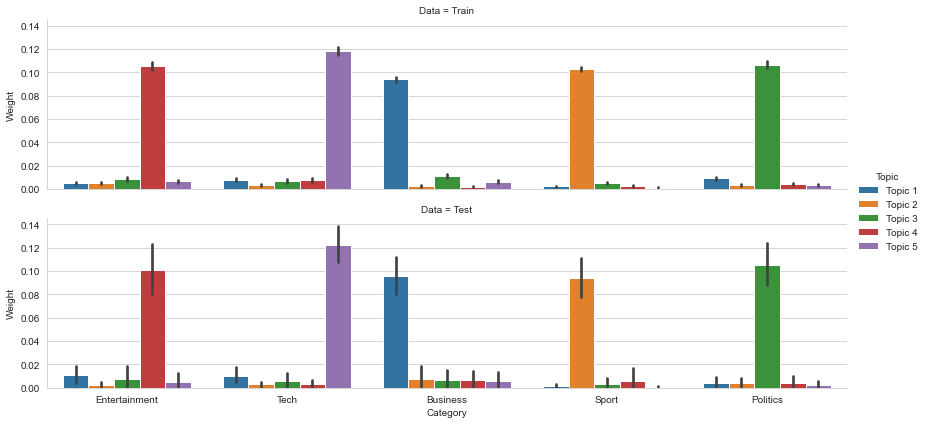

In [80]:
result = pd.melt(train_result.assign(Data='Train')
                 .append(test_eval.assign(Data='Test'))
                 .reset_index(),
                 id_vars=['Data', 'Category'],
                 var_name='Topic',
                 value_name='Weight')

g =sns.catplot(x='Category', 
               y='Weight', 
               hue='Topic', 
               row='Data', 
               kind='bar', 
               data=result, 
               height=3,
               aspect=4)

### Самые главные термины

In [81]:
topics = pd.DataFrame(nmf.components_.T,
                      index=tokens,
                      columns=topic_labels)
topics.loc[word_count.head(10).index]

Topic 1  Topic 2  Topic 3  Topic 4  Topic 5
film         0.00     0.00     0.00     0.89     0.00
game         0.00     0.47     0.00     0.03     0.15
best         0.04     0.14     0.02     0.54     0.00
labour       0.00     0.00     0.58     0.00     0.00
music        0.00     0.00     0.00     0.34     0.28
company      0.40     0.00     0.00     0.05     0.09
election     0.00     0.00     0.50     0.00     0.00
england      0.03     0.41     0.05     0.00     0.00
market       0.37     0.00     0.00     0.00     0.12
party        0.00     0.00     0.48     0.00     0.00

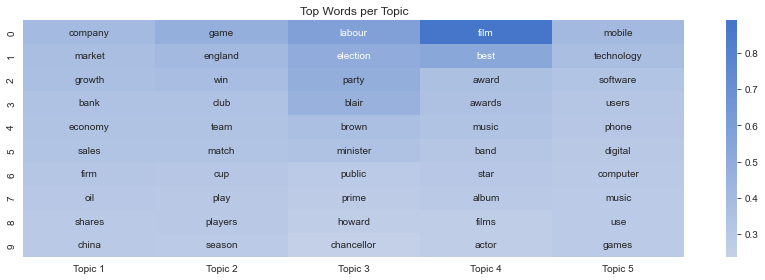

In [82]:
fig, ax = plt.subplots(figsize=(12, 4))
top_words, top_vals = pd.DataFrame(), pd.DataFrame()
for topic, words_ in topics.items():
    top10 = words_.nlargest(10).index
    vals = words_.loc[top10].values
    top_vals[topic] = vals
    top_words[topic] = top10.tolist()
sns.heatmap(pd.DataFrame(top_vals), 
            annot=top_words, 
            fmt = '', 
            center=0, 
            cmap=sns.diverging_palette(0, 255, sep=1, n=256), 
            ax=ax)
ax.set_title('Top Words per Topic')
fig.tight_layout()

In [83]:
topics = pd.DataFrame(nmf.components_.T,
                      index=words,
                      columns=topic_labels)
topics.head()

Topic 1  Topic 2  Topic 3  Topic 4  Topic 5
000m     0.00     0.07     0.00     0.00     0.00
10       0.12     0.08     0.04     0.11     0.06
100      0.06     0.01     0.04     0.02     0.05
100m     0.02     0.05     0.00     0.01     0.00
11       0.08     0.03     0.03     0.08     0.01

In [84]:
top_words = {}
for topic, words_ in topics.items():
    top_words[topic] = words_.nlargest(10).index.tolist()
pd.DataFrame(top_words)

Topic 1  Topic 2     Topic 3 Topic 4     Topic 5
0  company     game      labour    film      mobile
1   market  england    election    best  technology
2   growth      win       party   award    software
3     bank     club       blair  awards       users
4  economy     team       brown   music       phone
5    sales    match    minister    band     digital
6     firm      cup      public    star    computer
7      oil     play       prime   album       music
8   shares  players      howard   films         use
9    china   season  chancellor   actor       games